# Import Libraries

In [3]:
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import Callback, EarlyStopping

# Load and Visualize Dataset

In [6]:
train_df = pd.read_csv(r'C:\Users\soham\OneDrive\Desktop\ML Projects\Codsoft\Movie_Genre_Classificatn\Genre Classification Dataset\train_data.txt', sep=":::", header=None, engine='python')
test_df = pd.read_csv(r'C:\Users\soham\OneDrive\Desktop\ML Projects\Codsoft\Movie_Genre_Classificatn\Genre Classification Dataset\test_data.txt', sep=":::", header=None, engine='python')
train_df.columns=['id','title','genre','description']
test_df.columns=['id','title', 'description']
train_df.head(20)

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [4]:
test_df.head(20)

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [5]:
train_df.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [7]:
train_df.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

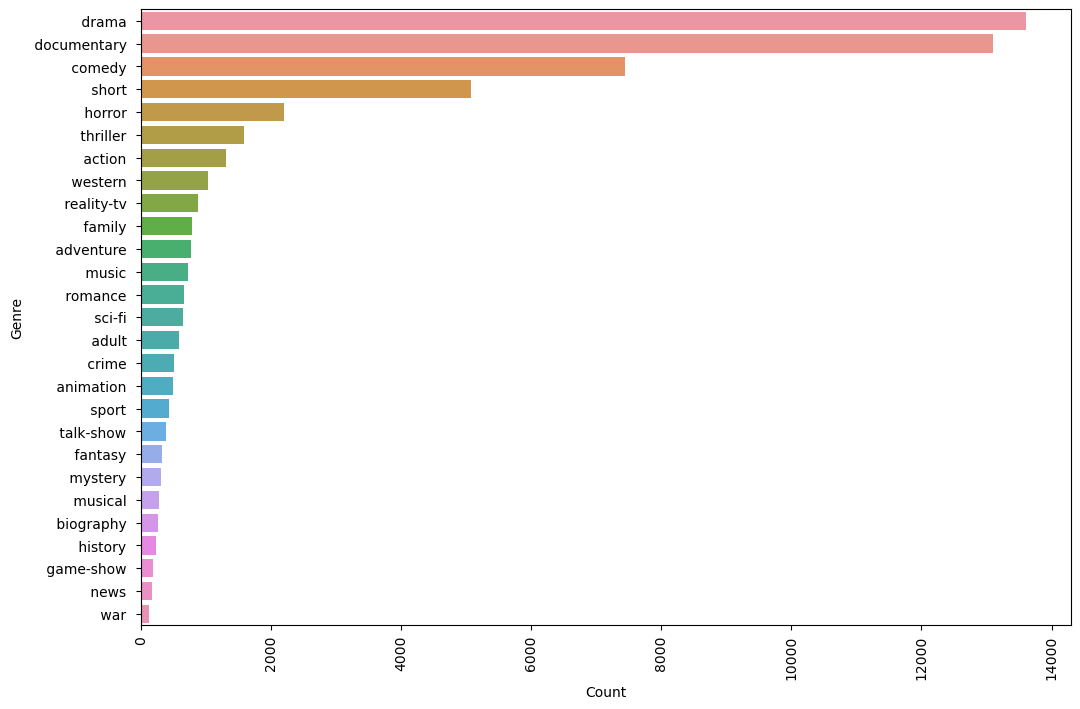

In [8]:
plt.figure(figsize = (12,8))
counts = train_df.genre.value_counts()
sns.barplot(x = counts, y = counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=90);

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

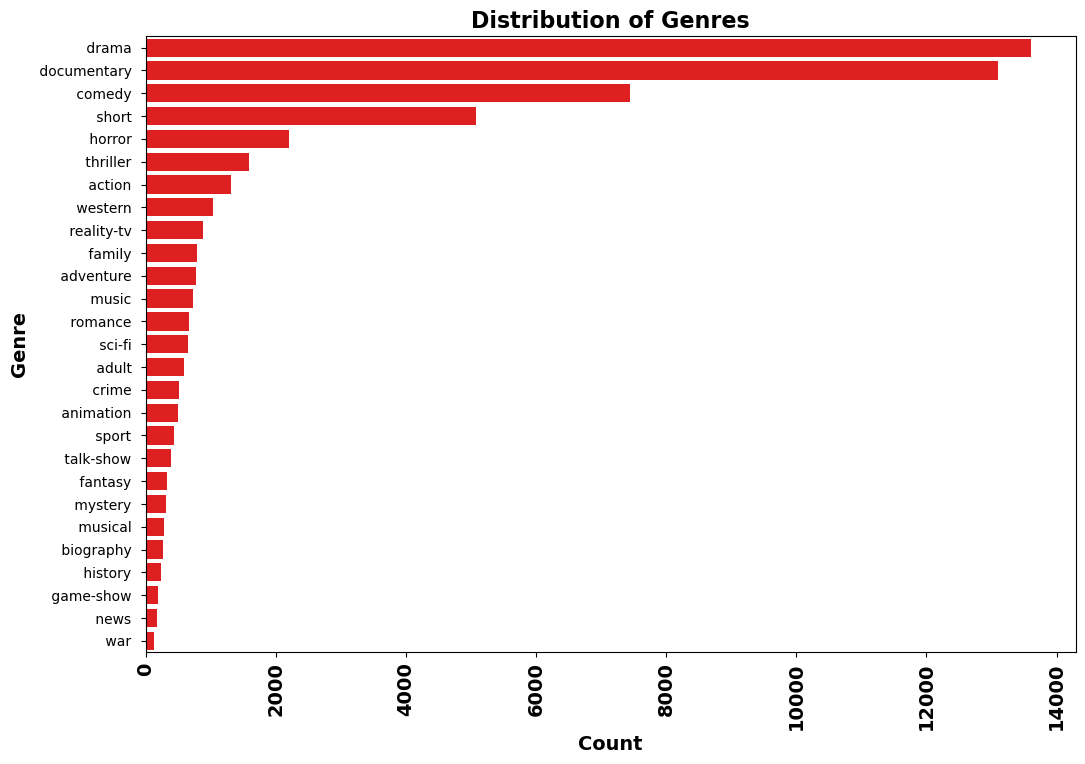

In [9]:
plt.figure(figsize=(12,8))
counts = train_df.genre.value_counts()
sns.barplot(x=counts, y=counts.index, color='Red')
plt.ylabel('Genre' ,fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')

In [10]:
train_df['length']=train_df['description'].apply(len)
train_df.head(20)

,id,title,genre,description,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1609
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,345
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,332
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",456
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...,426


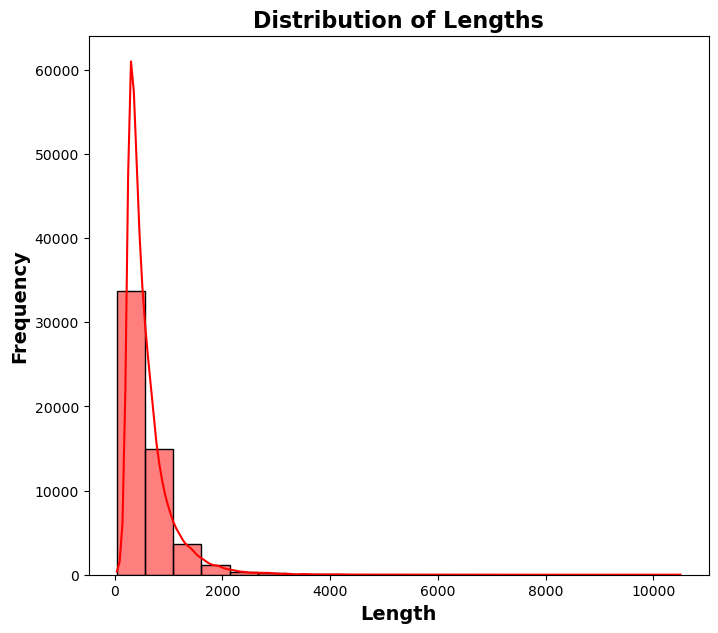

In [11]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_df, x='length', bins=20, kde=True, color='red')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

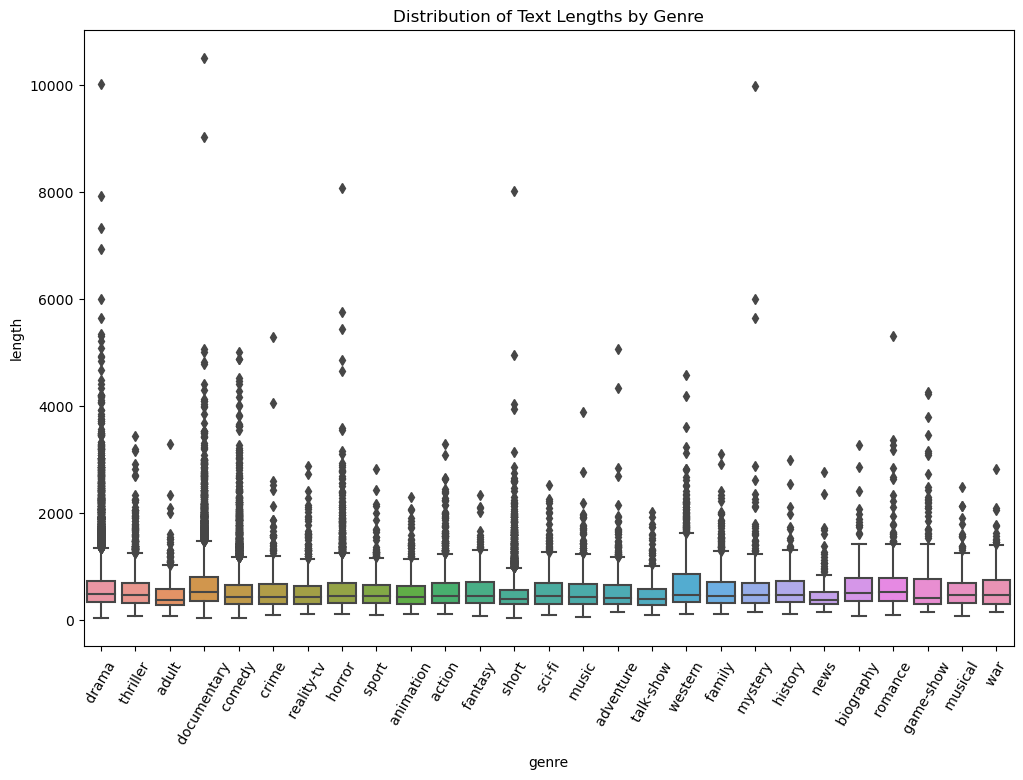

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='length', data=train_df)
plt.xticks(rotation=60)
plt.title('Distribution of Text Lengths by Genre')
plt.show()

# Data Cleaning

In [13]:
import re
import string
import nltk
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
custom_stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'you', 'i',  # Add more common words as needed
])
def clean_text(text):
    text = text.lower()  # lower-case all characters
    text = re.sub('-', ' ', text.lower())  # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]', ' ', text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in custom_stopwords])  # remove custom stopwords and stem other words
    text = re.sub(r'@\S+', '', text)  # remove twitter handles
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text, language="english", preserve_line=True)
    
    text = " ".join([i for i in words if i not in custom_stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # remove punctuations

# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost from hello bye iem


In [14]:
train_df['Text_cleaning'] = train_df.description.apply(clean_text)
test_df['Text_cleaning'] = test_df.description.apply(clean_text)
train_df.head()

,id,title,genre,description,length,Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers between his doct parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist with past incestu rel hav cur murd ...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud for their field trip muse nat h...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help their unemploy fath mak end meet edi her ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref not recov body ground zero but ...


In [15]:
train_df['length_Text_cleaning'] = train_df['Text_cleaning'].apply(len)
train_df.head()

,id,title,genre,description,length,Text_cleaning,length_Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers between his doct parents year old...,369
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist with past incestu rel hav cur murd ...,116
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud for their field trip muse nat h...,438
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help their unemploy fath mak end meet edi her ...,744
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref not recov body ground zero but ...,327


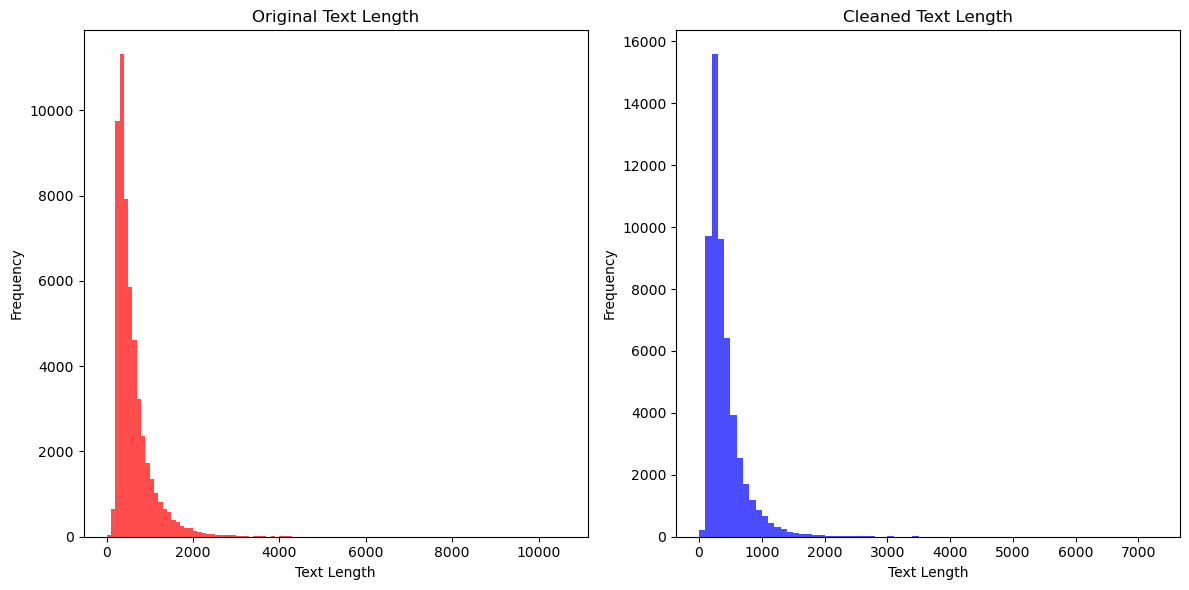

In [19]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_df['description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='red', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_df['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
(train_df['length_Text_cleaning']>2000).value_counts()

length_Text_cleaning
False    54009
True       205
Name: count, dtype: int64

In [21]:
#Remove extremely long descriptions: outliers
print('Dataframe size (before removal): ',len(train_df))
filt=train_df['length_Text_cleaning']>2000
train_df.drop(train_df[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(train_df))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54009
Removed rows: 205


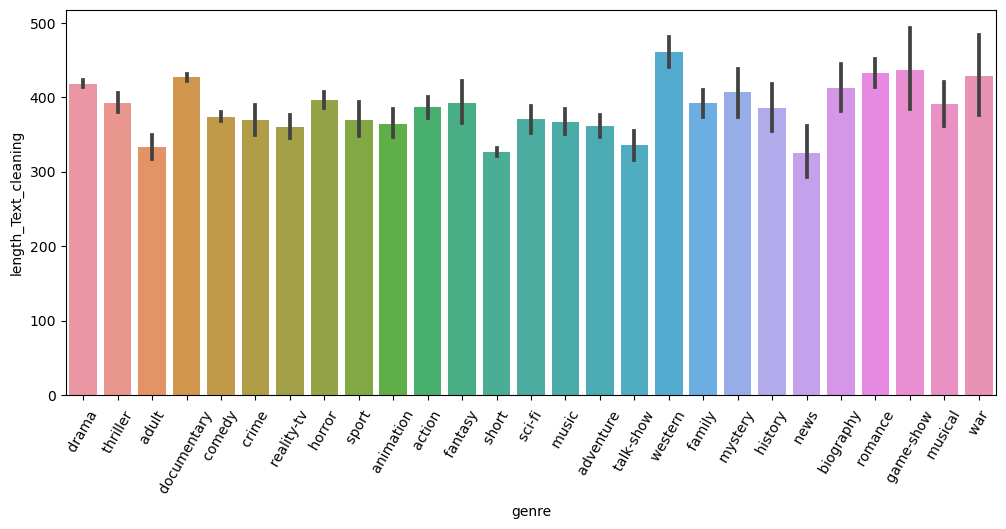

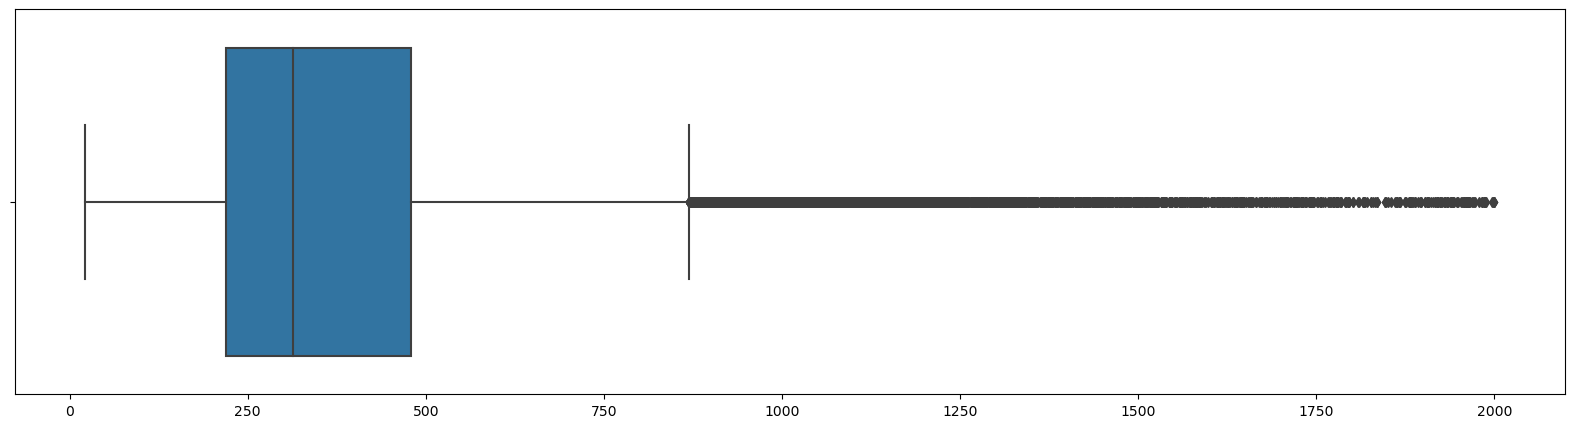

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='length_Text_cleaning',data=train_df)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=train_df['length_Text_cleaning'].values,hue='genre',data=train_df)
plt.show()

In [24]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_df['Text_cleaning'].values)

In [27]:
test_solution_df = pd.read_csv('C:/Users/soham/OneDrive/Desktop/Codsoft/Task -1/archive/Genre Classification Dataset/test_data_solution.txt', sep=":::", header=None, engine='python')
test_solution_df.columns= ['id','title','genre','description']
test_solution_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [29]:
X = tokenizer.texts_to_sequences(train_df['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_df['genre']).values

X_test = tokenizer.texts_to_sequences(test_df['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_solution_df['genre']).values

# Model Training

In [32]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))  # return_sequences=True for stacking LSTMs
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_loss', min_delta=0, patience=2, mode='auto')]
model_history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

In [ ]:
model.save('movie-genre-classification.h5')

# Accuracy Analysis

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))